## **Goal** 

## The goal here is to classify Food reviews based on customer's text.

Let's load some library needed throughout the analysis:

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten,SimpleRNN,Bidirectional,LSTM,GRU,Dropout

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/food_review.csv")

In [3]:
df.head()

,Unnamed: 0,Text,Score
0,0,I bought these from a large chain pet store. a...,1
1,1,"This soup is incredibly good! But honestly, I...",5
2,2,Our family loves these tasty and healthy sesam...,5
3,3,The local auto shop offers this free to it cus...,4
4,4,I brought 2 bottles. One I carry in my pocket...,5


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    40500 non-null  object
 1   Score   40500 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 632.9+ KB


In [6]:
df.shape

(40500, 2)

In [7]:
df.describe()

,Score
count,40500.000000
mean,3.001877
std,1.413811
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [8]:
df["Score"].value_counts()

4    8117
5    8106
3    8103
2    8095
1    8079
Name: Score, dtype: int64

There is 5 multiple categories in target column(Score) ,So it is a multi-class classification problem

**Visualization of Class-1 Review**

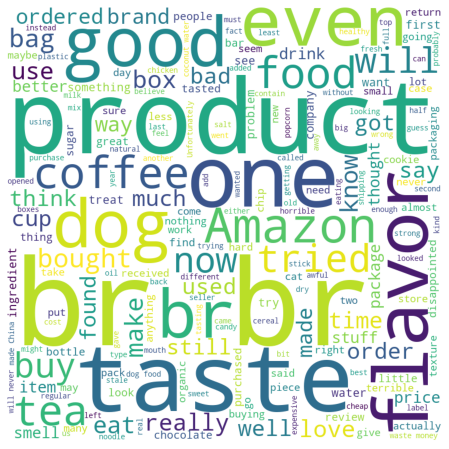

In [9]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df[df["Score"]==1]["Text"]))

plt.figure(figsize = (8,8)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

**Visualization of Class-2 Review**

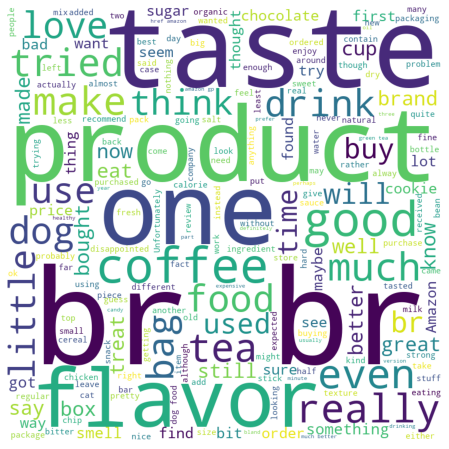

In [10]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df[df["Score"]==2]["Text"]))

plt.figure(figsize = (8,8)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

**Visualization of Class-3 Review**

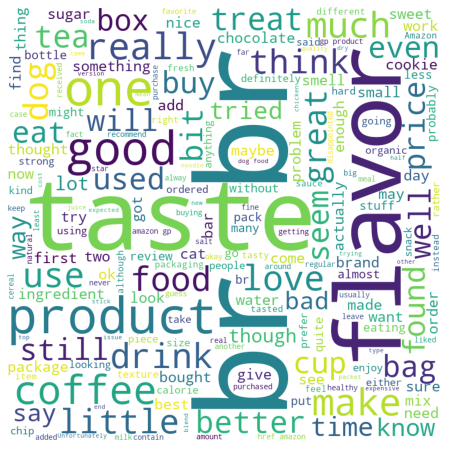

In [11]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df[df["Score"]==3]["Text"]))

plt.figure(figsize = (8,8)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

**Visualization of Class-4 Review**

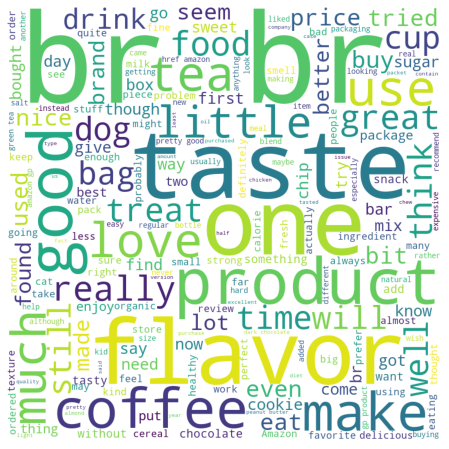

In [12]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df[df["Score"]==4]["Text"]))

plt.figure(figsize = (8,8)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

**Visualization of Class-5 Review**

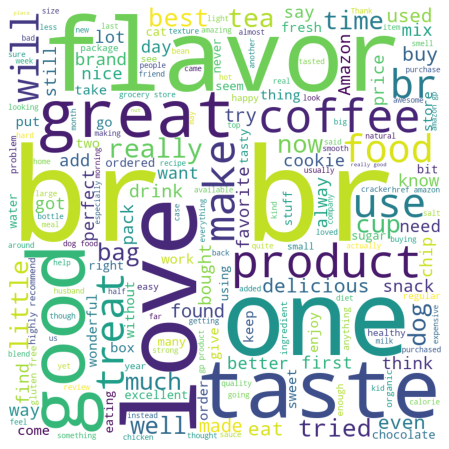

In [13]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df[df["Score"]==5]["Text"]))

plt.figure(figsize = (8,8)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

#### visualizing target variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


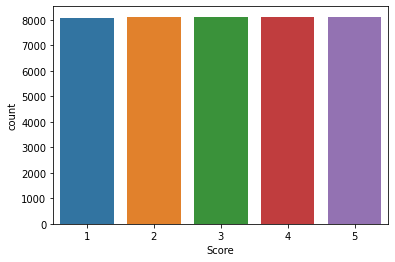

In [14]:
plt.figure()
sns.countplot(df['Score'])
plt.show()


#### creating features and label 

In [15]:
X = df["Text"]
y = df['Score']

#### splitting data into training set and test set

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

tokenization

In [17]:
tokenizer = Tokenizer(oov_token="<oov>")

In [18]:
tokenizer.fit_on_texts(X_train)

In [19]:
vocab_len = len(tokenizer.index_word)

In [20]:
print(vocab_len)

34732


In [21]:
train_sequences = tokenizer.texts_to_sequences(X_train)

#### Padding

In [22]:
doc_length = []
for doc in train_sequences:
  doc_length.append(len(doc))

In [23]:
max(doc_length)

1761

In [24]:
max_len = int(np.quantile(doc_length , 0.90))

In [25]:
max_len

179

In [26]:
train_padded = pad_sequences(train_sequences , maxlen=max_len)

#### Test Data

In [27]:
test_sequences = tokenizer.texts_to_sequences(X_test)

In [28]:
test_padded = pad_sequences(test_sequences , maxlen=max_len)

### NN

In [29]:
model = Sequential()
model.add(Embedding(vocab_len+1,20,input_length=max_len,mask_zero=True))
model.add(Flatten())
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(6,activation='softmax'))


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 179, 20)           694660    
_________________________________________________________________
flatten (Flatten)            (None, 3580)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                57296     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
Total params: 752,146
Trainable params: 752,146
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam")

In [32]:
history = model.fit(train_padded,y_train,epochs=20,batch_size=50,validation_data=(train_padded,y_train))

Epoch 1/20
567/567 [==============================] - 7s 11ms/step - loss: 1.4765 - val_loss: 1.1894
Epoch 2/20
567/567 [==============================] - 6s 11ms/step - loss: 1.1548 - val_loss: 0.9649
Epoch 3/20
567/567 [==============================] - 5s 10ms/step - loss: 0.9173 - val_loss: 0.6761
Epoch 4/20
567/567 [==============================] - 6s 11ms/step - loss: 0.6328 - val_loss: 0.4045
Epoch 5/20
567/567 [==============================] - 6s 11ms/step - loss: 0.3824 - val_loss: 0.2264
Epoch 6/20
567/567 [==============================] - 6s 11ms/step - loss: 0.2104 - val_loss: 0.1160
Epoch 7/20
567/567 [==============================] - 6s 11ms/step - loss: 0.1098 - val_loss: 0.0540
Epoch 8/20
567/567 [==============================] - 6s 10ms/step - loss: 0.0537 - val_loss: 0.0281
Epoch 9/20
567/567 [==============================] - 6s 10ms/step - loss: 0.0291 - val_loss: 0.0217
Epoch 10/20
567/567 [==============================] - 6s 11ms/step - loss: 0.0194 - val_lo

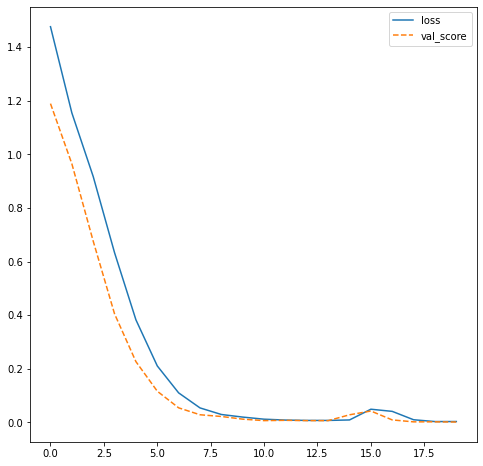

In [33]:
fig , ax = plt.subplots(figsize=(8,8))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'],label='val_score',linestyle='--')
plt.legend()

In [34]:
y_pred = model.predict(test_padded)

In [35]:
y_pred

array([[1.7702736e-14, 2.0428550e-12, 9.9958712e-01, 5.8492024e-05,
        3.5438334e-04, 2.0838314e-11],
       [1.6595407e-14, 9.9995244e-01, 4.7542482e-05, 4.6641890e-10,
        5.5034905e-13, 1.3741107e-18],
       [2.2239426e-13, 8.1558794e-13, 3.5851517e-05, 3.7070488e-06,
        9.8790330e-01, 1.2057130e-02],
       ...,
       [6.9307515e-10, 5.1959288e-01, 4.7815675e-01, 2.2465063e-03,
        3.9324009e-06, 1.8166622e-12],
       [4.7023844e-14, 4.0197950e-13, 7.8628227e-07, 7.0450840e-11,
        1.3770192e-03, 9.9862218e-01],
       [3.9546227e-14, 9.9994004e-01, 5.9942435e-05, 5.2790449e-11,
        2.8665969e-13, 1.9147183e-17]], dtype=float32)

In [36]:
y_pred = y_pred.argmax(axis=1)

In [37]:
y_pred

array([2, 1, 4, ..., 1, 5, 1])

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.67      0.48      0.56      2409
           2       0.41      0.48      0.44      2426
           3       0.45      0.45      0.45      2492
           4       0.40      0.53      0.46      2420
           5       0.66      0.52      0.58      2403

    accuracy                           0.49     12150
   macro avg       0.52      0.49      0.50     12150
weighted avg       0.52      0.49      0.50     12150



In [39]:
mat = confusion_matrix(y_test,y_pred)

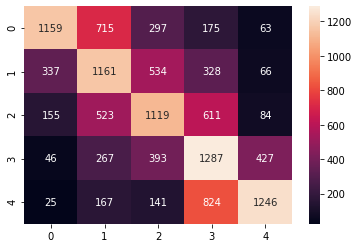

In [40]:
sns.heatmap(mat,annot=True,fmt='d')

### RNN

In [41]:
model2 = Sequential()
model2.add(Embedding(vocab_len+1, 20, input_length=max_len, mask_zero=True))
model2.add(SimpleRNN(32, activation="relu", return_sequences=True))
model2.add(SimpleRNN(32, activation="relu"))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(6,activation="softmax"))

In [42]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 179, 20)           694660    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 179, 32)           1696      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 102       
Total params: 699,066
Trainable params: 699,066
Non-trainable params: 0
_________________________________________________________________


In [43]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer="adam")

In [44]:
history = model2.fit(train_padded,y_train,epochs=10,batch_size=30,validation_data=(train_padded,y_train))

Epoch 1/10
945/945 [==============================] - 117s 122ms/step - loss: 1.4760 - val_loss: 1.3826
Epoch 2/10
945/945 [==============================] - 115s 122ms/step - loss: 1.2647 - val_loss: 1.1242
Epoch 3/10
945/945 [==============================] - 115s 122ms/step - loss: 1.0961 - val_loss: 0.9535
Epoch 4/10
945/945 [==============================] - 115s 121ms/step - loss: 0.9666 - val_loss: 0.8018
Epoch 5/10
945/945 [==============================] - 116s 122ms/step - loss: 0.8464 - val_loss: 0.6724
Epoch 6/10
945/945 [==============================] - 115s 122ms/step - loss: 0.7140 - val_loss: 0.5532
Epoch 7/10
945/945 [==============================] - 115s 122ms/step - loss: 0.6173 - val_loss: 0.4543
Epoch 8/10
945/945 [==============================] - 115s 122ms/step - loss: 0.5364 - val_loss: 0.4830
Epoch 9/10
945/945 [==============================] - 116s 123ms/step - loss: 0.4833 - val_loss: 0.4369
Epoch 10/10
945/945 [==============================] - 115s 121m

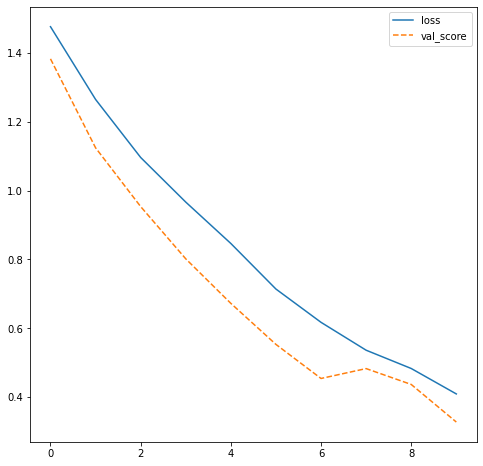

In [45]:
fig , ax = plt.subplots(figsize=(8,8))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'],label='val_score',linestyle='--')
plt.legend()

In [46]:
y_pred = model2.predict(test_padded)
y_pred

array([[2.4795916e-05, 3.3443291e-02, 3.1037848e-02, 1.1901519e-01,
        7.4944133e-01, 6.7037500e-02],
       [6.3170890e-17, 6.4772177e-01, 3.5181874e-01, 2.9464520e-04,
        7.1181203e-05, 9.3696464e-05],
       [1.4457331e-10, 4.5870050e-04, 5.5928685e-04, 4.5265013e-04,
        1.6254049e-02, 9.8227537e-01],
       ...,
       [3.4923271e-06, 6.2212628e-01, 3.5425699e-01, 1.2236206e-02,
        8.4732221e-03, 2.9038368e-03],
       [6.6100984e-05, 3.2675430e-02, 3.1785667e-02, 6.2703595e-02,
        3.5352522e-01, 5.1924396e-01],
       [1.1349368e-27, 9.9993896e-01, 6.0984246e-05, 7.7920951e-12,
        1.1748551e-10, 1.4975219e-09]], dtype=float32)

In [47]:
y_pred = y_pred.argmax(axis=1)


In [48]:
y_pred

array([4, 1, 5, ..., 1, 5, 1])

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.64      0.48      0.55      2409
           2       0.42      0.44      0.43      2426
           3       0.40      0.44      0.42      2492
           4       0.39      0.42      0.41      2420
           5       0.58      0.59      0.59      2403

    accuracy                           0.47     12150
   macro avg       0.49      0.47      0.48     12150
weighted avg       0.48      0.47      0.48     12150



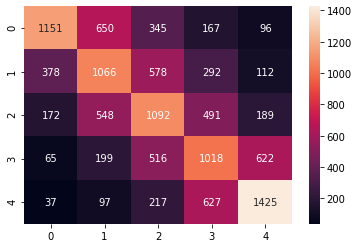

In [50]:
mat1 = confusion_matrix(y_test,y_pred)
sns.heatmap(mat1, fmt='d',annot=True)

### Biadirectional

In [51]:
model3 = Sequential()
model3.add(Embedding(vocab_len+1, 10, input_length=max_len, mask_zero=True))
model3.add(Bidirectional(SimpleRNN(32, activation="relu", return_sequences=True)))
model3.add(Bidirectional(SimpleRNN(32, activation="relu")))
model3.add(Dense(16, activation="relu"))
model3.add(Dense(6,activation="softmax"))

In [52]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 179, 10)           347330    
_________________________________________________________________
bidirectional (Bidirectional (None, 179, 64)           2752      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                6208      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 102       
Total params: 357,432
Trainable params: 357,432
Non-trainable params: 0
_________________________________________________________________


In [53]:
model3.compile(loss='sparse_categorical_crossentropy',optimizer="adam")

In [54]:
history = model3.fit(train_padded,y_train,epochs=10,batch_size=40,validation_data=(train_padded,y_train))

Epoch 1/10
709/709 [==============================] - 188s 261ms/step - loss: 1.5410 - val_loss: 1.2960
Epoch 2/10
709/709 [==============================] - 184s 260ms/step - loss: 1.2275 - val_loss: 1.0106
Epoch 3/10
709/709 [==============================] - 184s 260ms/step - loss: 1.0207 - val_loss: 0.8310
Epoch 4/10
709/709 [==============================] - 184s 260ms/step - loss: 0.8447 - val_loss: 0.6781
Epoch 5/10
709/709 [==============================] - 185s 260ms/step - loss: 0.6875 - val_loss: 0.5180
Epoch 6/10
709/709 [==============================] - 185s 261ms/step - loss: 0.5570 - val_loss: 0.3975
Epoch 7/10
709/709 [==============================] - 183s 259ms/step - loss: 0.4513 - val_loss: 0.3299
Epoch 8/10
709/709 [==============================] - 184s 259ms/step - loss: 0.3645 - val_loss: 0.2497
Epoch 9/10
709/709 [==============================] - 182s 257ms/step - loss: 0.3050 - val_loss: 0.2239
Epoch 10/10
709/709 [==============================] - 184s 259m

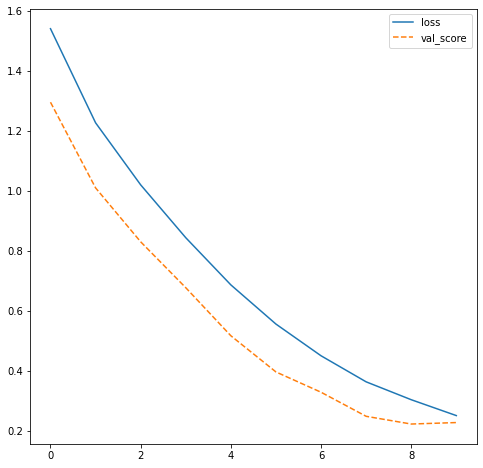

In [55]:
fig , ax = plt.subplots(figsize=(8,8))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'],label='val_score',linestyle='--')
plt.legend()

In [56]:
y_pred = model3.predict(test_padded)
y_pred

array([[1.0851770e-14, 3.7033271e-05, 1.1642782e-03, 7.4001342e-01,
        2.1502845e-01, 4.3756790e-02],
       [7.0088325e-13, 9.7768116e-01, 2.0156348e-02, 2.1151158e-03,
        2.9114812e-05, 1.8190034e-05],
       [5.5661560e-12, 2.3779297e-05, 2.1280910e-05, 4.0537532e-05,
        2.8096458e-01, 7.1894974e-01],
       ...,
       [1.4854568e-08, 9.9633813e-01, 3.2783893e-04, 2.8518054e-03,
        1.7279779e-05, 4.6503483e-04],
       [1.7386408e-10, 9.1855763e-06, 2.7834671e-04, 1.7829145e-04,
        1.9690646e-02, 9.7984356e-01],
       [8.9338313e-13, 9.6392208e-01, 3.5096917e-02, 9.3994330e-04,
        5.5658043e-06, 3.5528068e-05]], dtype=float32)

In [57]:
y_pred = y_pred.argmax(axis=1)

In [58]:
y_pred

array([3, 1, 5, ..., 1, 5, 1])

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.62      0.53      0.57      2409
           2       0.46      0.39      0.42      2426
           3       0.44      0.43      0.44      2492
           4       0.41      0.39      0.40      2420
           5       0.54      0.75      0.63      2403

    accuracy                           0.50     12150
   macro avg       0.49      0.50      0.49     12150
weighted avg       0.49      0.50      0.49     12150



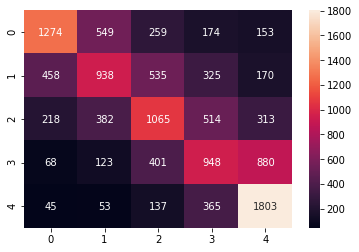

In [60]:
mat3 = confusion_matrix(y_test,y_pred)
sns.heatmap(mat3, fmt='d',annot=True)

### LSTM

In [61]:
model4 = Sequential()
model4.add(Embedding(vocab_len+1, 10, input_length=max_len, mask_zero=True))
model4.add(LSTM(32, activation="relu", return_sequences=True))
model4.add(LSTM(32, activation="relu"))
model4.add(Dense(16, activation="relu"))
model4.add(Dense(6,activation="softmax"))

In [62]:
model4.compile(loss='sparse_categorical_crossentropy',optimizer="adam")
history = model4.fit(train_padded,y_train,epochs=10,batch_size=30,validation_data=(train_padded,y_train))

Epoch 1/10
945/945 [==============================] - 167s 174ms/step - loss: 199.0253 - val_loss: 1.6064
Epoch 2/10
945/945 [==============================] - 164s 173ms/step - loss: 65.1830 - val_loss: 1.6047
Epoch 3/10
945/945 [==============================] - 165s 174ms/step - loss: 1.6593 - val_loss: 1.5635
Epoch 4/10
945/945 [==============================] - 164s 174ms/step - loss: 1202827427840.0000 - val_loss: 1.4946
Epoch 5/10
945/945 [==============================] - 165s 174ms/step - loss: 9437654.0000 - val_loss: 62839388.0000
Epoch 6/10
945/945 [==============================] - 164s 174ms/step - loss: 122195.7422 - val_loss: 7681.2510
Epoch 7/10
945/945 [==============================] - 165s 174ms/step - loss: 69966.6172 - val_loss: 2188.2322
Epoch 8/10
945/945 [==============================] - 165s 174ms/step - loss: 9303.1729 - val_loss: 1359.7672
Epoch 9/10
945/945 [==============================] - 164s 174ms/step - loss: 2089.5496 - val_loss: 2881.4741
Epoch 10/

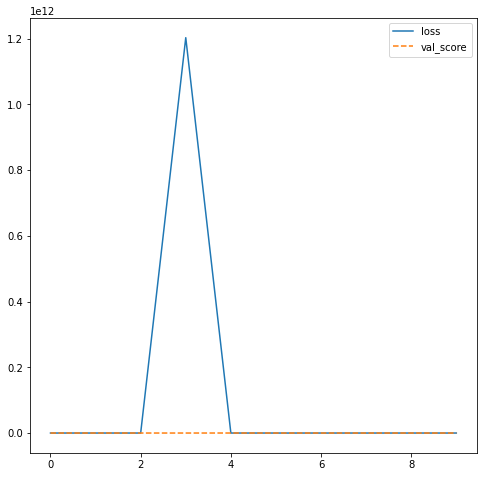

In [63]:
fig , ax = plt.subplots(figsize=(8,8))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'],label='val_score',linestyle='--')
plt.legend()

In [64]:
y_pred = model4.predict(test_padded)
y_pred

array([[1.82480198e-06, 1.02583915e-01, 1.17276706e-01, 1.79634839e-01,
        2.71232396e-01, 3.29270273e-01],
       [1.20980648e-08, 4.41778988e-01, 2.98361331e-01, 1.97293192e-01,
        5.89657761e-02, 3.60070216e-03],
       [2.25867348e-06, 1.23484507e-01, 1.41815692e-01, 2.01497868e-01,
        2.65555978e-01, 2.67643720e-01],
       ...,
       [3.14864155e-06, 3.14589649e-01, 3.48510414e-01, 2.24758193e-01,
        9.03056636e-02, 2.18329374e-02],
       [8.79422373e-07, 2.55123712e-02, 2.98487116e-02, 7.65722468e-02,
        2.36590877e-01, 6.31474912e-01],
       [2.28022736e-06, 1.14155166e-01, 1.31625712e-01, 1.94502935e-01,
        2.70476520e-01, 2.89237320e-01]], dtype=float32)

In [65]:
y_pred = y_pred.argmax(axis=1)

In [66]:
y_pred

array([5, 1, 5, ..., 2, 5, 5])

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.51      0.22      0.31      2409
           2       0.28      0.41      0.33      2426
           3       0.27      0.14      0.18      2492
           4       0.23      0.19      0.21      2420
           5       0.37      0.65      0.47      2403

    accuracy                           0.32     12150
   macro avg       0.33      0.32      0.30     12150
weighted avg       0.33      0.32      0.30     12150



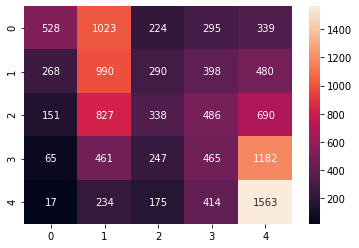

In [68]:
mat4 = confusion_matrix(y_test,y_pred)
sns.heatmap(mat4, fmt='d',annot=True)

### LSTM Bidirectional

In [71]:
model5 = Sequential()
model5.add(Embedding(vocab_len+1, 10, input_length=max_len, mask_zero=True))
model.add(Dropout(0.5))
model5.add(Bidirectional(LSTM(32, activation="relu", return_sequences=True)))
model.add(Dropout(0.5))
model5.add(Bidirectional(LSTM(32, activation="relu")))
model.add(Dropout(0.5))
model5.add(Dense(16, activation="relu"))
model.add(Dropout(0.5))
model5.add(Dense(6,activation="softmax"))

In [72]:
model5.compile(loss='sparse_categorical_crossentropy',optimizer="adam")
history = model5.fit(train_padded,y_train,epochs=10,batch_size=30,validation_data=(train_padded,y_train))

Epoch 1/10
945/945 [==============================] - 300s 314ms/step - loss: 25.4126 - val_loss: 1.6044
Epoch 2/10
945/945 [==============================] - 295s 313ms/step - loss: 23142.1797 - val_loss: 1.5660
Epoch 3/10
945/945 [==============================] - 295s 312ms/step - loss: 1.5082 - val_loss: 1.4950
Epoch 4/10
945/945 [==============================] - 295s 312ms/step - loss: 2.2893 - val_loss: 1.4220
Epoch 5/10
945/945 [==============================] - 295s 313ms/step - loss: 1.3240 - val_loss: 1.2344
Epoch 6/10
945/945 [==============================] - 296s 313ms/step - loss: 1200878.2500 - val_loss: 2.1533
Epoch 7/10
945/945 [==============================] - 296s 313ms/step - loss: 2.1709 - val_loss: 593.6789
Epoch 8/10
945/945 [==============================] - 296s 313ms/step - loss: 177.1745 - val_loss: 1.4340
Epoch 9/10
945/945 [==============================] - 295s 313ms/step - loss: 1.4241 - val_loss: 1.4011
Epoch 10/10
945/945 [============================

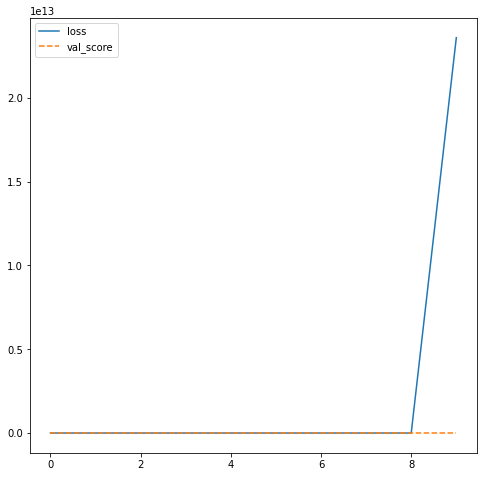

In [77]:

fig , ax = plt.subplots(figsize=(8,8))
 
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'],label='val_score',linestyle='--')
plt.legend()

In [74]:
y_pred = model5.predict(test_padded)
y_pred


array([[3.41373624e-10, 2.61695802e-01, 4.11626309e-01, 2.23353803e-01,
        5.92265017e-02, 4.40975502e-02],
       [5.57708852e-37, 9.09476459e-01, 9.04318318e-02, 9.17112266e-05,
        9.02240327e-09, 2.16560814e-09],
       [7.16931723e-08, 1.29520550e-01, 2.47126073e-01, 2.89317548e-01,
        1.72167405e-01, 1.61868334e-01],
       ...,
       [9.36299107e-13, 3.79718870e-01, 4.89325911e-01, 1.15943946e-01,
        9.38790012e-03, 5.62337413e-03],
       [3.73863190e-10, 2.39698917e-01, 3.93390805e-01, 2.39991397e-01,
        7.25939050e-02, 5.43250144e-02],
       [1.42495508e-25, 9.48013663e-01, 5.10566197e-02, 9.27424117e-04,
        1.69674945e-06, 6.63117760e-07]], dtype=float32)

In [75]:
y_pred = y_pred.argmax(axis=1)

In [76]:
y_pred

array([2, 1, 3, ..., 2, 2, 1])

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.57      0.30      0.39      2409
           2       0.28      0.46      0.35      2426
           3       0.25      0.38      0.30      2492
           4       0.00      0.00      0.00      2420
           5       0.36      0.48      0.41      2403

    accuracy                           0.32     12150
   macro avg       0.29      0.32      0.29     12150
weighted avg       0.29      0.32      0.29     12150



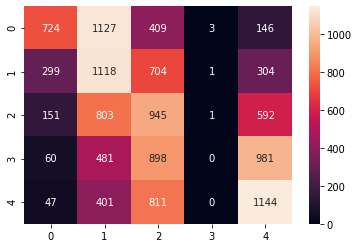

In [79]:
mat5 = confusion_matrix(y_test,y_pred)
sns.heatmap(mat5, fmt='d',annot=True)

### GRU

In [80]:
model6 = Sequential()
model6.add(Embedding(vocab_len+1, 10, input_length=max_len, mask_zero=True))
model6.add(Bidirectional(GRU(32, activation="relu")))
model6.add(Dense(16, activation="relu"))
model6.add(Dense(6,activation="softmax"))

In [81]:
model6.compile(loss='sparse_categorical_crossentropy',optimizer="adam")
history = model6.fit(train_padded,y_train,epochs=10,batch_size=30,validation_data=(train_padded,y_train))

Epoch 1/10
945/945 [==============================] - 128s 133ms/step - loss: 1.6545 - val_loss: 1.5905
Epoch 2/10
945/945 [==============================] - 126s 133ms/step - loss: 164.5791 - val_loss: 1.3381
Epoch 3/10
945/945 [==============================] - 126s 133ms/step - loss: 1.1952 - val_loss: 0.9886
Epoch 4/10
945/945 [==============================] - 126s 133ms/step - loss: 0.9902 - val_loss: 0.8651
Epoch 5/10
945/945 [==============================] - 126s 133ms/step - loss: 0.8619 - val_loss: 0.7279
Epoch 6/10
945/945 [==============================] - 126s 133ms/step - loss: 0.7534 - val_loss: 0.6389
Epoch 7/10
945/945 [==============================] - 126s 133ms/step - loss: 0.6567 - val_loss: 0.5427
Epoch 8/10
945/945 [==============================] - 126s 133ms/step - loss: 0.5743 - val_loss: 0.4702
Epoch 9/10
945/945 [==============================] - 126s 134ms/step - loss: 0.4958 - val_loss: 0.4057
Epoch 10/10
945/945 [==============================] - 127s 13

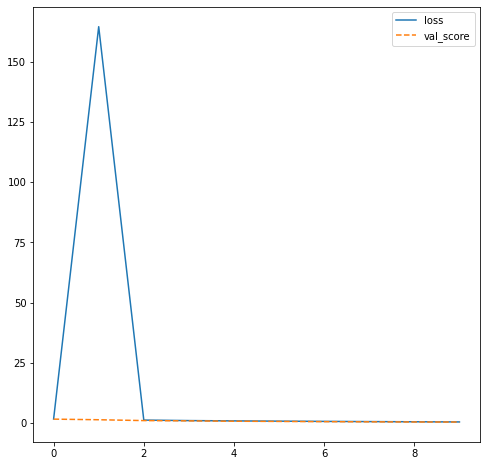

In [82]:
fig , ax = plt.subplots(figsize=(8,8))

plt.plot(history.history['loss'], label='loss')

plt.plot(history.history['val_loss'],label='val_score',linestyle='--')
plt.legend()

In [83]:
y_pred = model6.predict(test_padded)
y_pred

array([[3.14832253e-13, 8.15047845e-02, 8.38421643e-01, 7.39279240e-02,
        5.86758461e-03, 2.78053689e-04],
       [1.96248513e-15, 1.96718171e-01, 7.60024607e-01, 4.25222777e-02,
        7.06575403e-04, 2.84895596e-05],
       [1.83124696e-10, 1.49046928e-02, 2.13791076e-02, 1.18393488e-02,
        1.43983111e-01, 8.07893753e-01],
       ...,
       [6.34832718e-16, 8.15113425e-01, 1.79566726e-01, 4.19263588e-03,
        6.08958653e-04, 5.18204819e-04],
       [1.10014156e-07, 7.66169310e-01, 1.09391972e-01, 1.46060949e-02,
        1.63240302e-02, 9.35084075e-02],
       [1.08612388e-15, 9.97189105e-01, 1.89273199e-03, 5.80585547e-05,
        6.94545306e-05, 7.90695369e-04]], dtype=float32)

In [84]:
y_pred = y_pred.argmax(axis=1)

In [85]:
y_pred

array([2, 2, 5, ..., 1, 1, 1])

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.64      0.51      0.57      2409
           2       0.42      0.51      0.46      2426
           3       0.41      0.54      0.46      2492
           4       0.45      0.37      0.41      2420
           5       0.67      0.55      0.60      2403

    accuracy                           0.50     12150
   macro avg       0.52      0.50      0.50     12150
weighted avg       0.51      0.50      0.50     12150



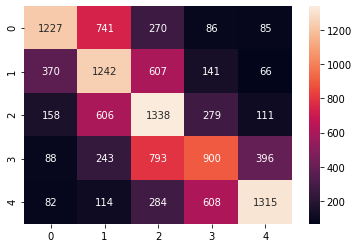

In [87]:
mat6 = confusion_matrix(y_test,y_pred)
sns.heatmap(mat6, fmt='d',annot=True)

### Observation
We have a simple overview of some techniques and algorithms in deep learning. Furthermore, there are more and more techniques apply deep learning as a solution.Even though RNN,LSTM is very powerful technique for text classification data but still it's unable to get better accuracy  in our dataset. The best model seem to be the Bidirectional Simple RNN model, The model generated an Accuracy of 50%.

**Now,Let's try with ML algorithms**

 CountVectorizer

In [89]:
cv = CountVectorizer(stop_words="english")

In [90]:
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)


LogisticRegression

In [133]:
lr = LogisticRegression()

In [134]:
lr.fit(X_train_cv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
y_pred = lr.predict(X_test_cv)

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.60      0.61      0.60      2409
           2       0.44      0.44      0.44      2426
           3       0.44      0.41      0.43      2492
           4       0.47      0.46      0.47      2420
           5       0.61      0.64      0.63      2403

    accuracy                           0.51     12150
   macro avg       0.51      0.51      0.51     12150
weighted avg       0.51      0.51      0.51     12150



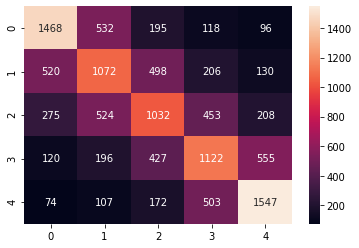

In [137]:
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat, fmt='d',annot=True)

SVC

In [138]:
lsv = LinearSVC(C=0.5,random_state=1)

In [139]:
lsv.fit(X_train_cv,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [140]:
y_pred = lsv.predict(X_test_cv)

In [141]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.60      0.60      0.60      2409
           2       0.46      0.44      0.45      2426
           3       0.45      0.42      0.43      2492
           4       0.45      0.45      0.45      2420
           5       0.59      0.64      0.61      2403

    accuracy                           0.51     12150
   macro avg       0.51      0.51      0.51     12150
weighted avg       0.51      0.51      0.51     12150



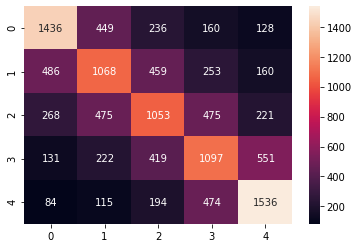

In [142]:
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat, fmt='d',annot=True)

RandomForestClassifier

In [143]:
rfc = RandomForestClassifier(n_estimators=100,random_state=1)

In [144]:
rfc.fit(X_train_cv,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [145]:
y_pred = rfc.predict(X_test_cv)

In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.58      0.71      0.64      2409
           2       0.52      0.41      0.46      2426
           3       0.52      0.41      0.46      2492
           4       0.50      0.44      0.47      2420
           5       0.54      0.72      0.62      2403

    accuracy                           0.54     12150
   macro avg       0.53      0.54      0.53     12150
weighted avg       0.53      0.54      0.53     12150



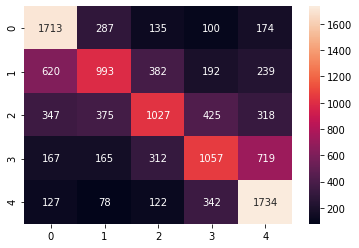

In [147]:
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat, fmt='d',annot=True)

TfidfVectorizer

In [148]:
tfidf = TfidfVectorizer(stop_words = "english")

In [149]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

LogisticRegression

In [150]:
lr1 = LogisticRegression()

In [151]:
lr1.fit(X_train_tfidf,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
y_pred1 = lr1.predict(X_test_tfidf)

In [153]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.60      0.66      0.63      2409
           2       0.46      0.41      0.44      2426
           3       0.45      0.40      0.43      2492
           4       0.48      0.48      0.48      2420
           5       0.62      0.69      0.65      2403

    accuracy                           0.53     12150
   macro avg       0.52      0.53      0.52     12150
weighted avg       0.52      0.53      0.52     12150



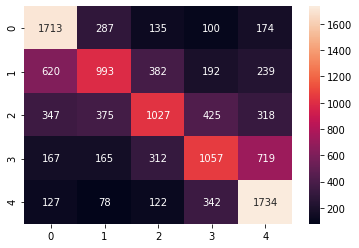

In [154]:
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat, fmt='d',annot=True)

SVC

In [155]:
lsv = LinearSVC(C=0.5,random_state=1)

In [156]:
lsv.fit(X_train_tfidf,y_train)

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [157]:
y_pred = lsv.predict(X_test_tfidf)

In [158]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.60      0.66      0.63      2409
           2       0.47      0.42      0.44      2426
           3       0.46      0.40      0.43      2492
           4       0.48      0.48      0.48      2420
           5       0.61      0.70      0.65      2403

    accuracy                           0.53     12150
   macro avg       0.53      0.53      0.53     12150
weighted avg       0.52      0.53      0.53     12150



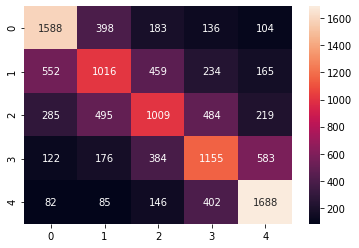

In [159]:
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat, fmt='d',annot=True)

RandomForestClassifier

In [165]:
rfc = RandomForestClassifier(n_estimators=100,random_state=1)

In [166]:
rfc.fit(X_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [167]:
y_pred = rfc.predict(X_test_tfidf)

In [168]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.55      0.72      0.62      2409
           2       0.52      0.40      0.45      2426
           3       0.51      0.40      0.45      2492
           4       0.50      0.41      0.45      2420
           5       0.55      0.72      0.62      2403

    accuracy                           0.53     12150
   macro avg       0.53      0.53      0.52     12150
weighted avg       0.52      0.53      0.52     12150



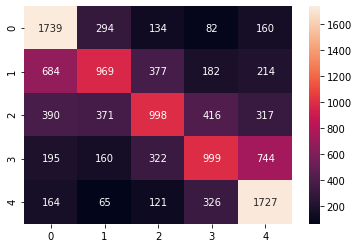

In [169]:
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat, fmt='d',annot=True)

We have a simple overview of some techniques and algorithms in machine learning. Furthermore, there are more and more techniques apply machine learning as a solution. The best model seem to be the Random Forest model  The model generated an Accuracy of 54%.